In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import os

# Erstellen Sie das Verzeichnis zum Speichern der RQA-Daten, falls es nicht existiert
output_dir = 'rqa_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [6]:
def create_recurrence_matrix(file_path: str, distance_threshold: float, output_dir: str) -> str:
    """
    Erstellt eine Recurrence-Matrix aus einer Parquet-Datei und speichert sie.

    Args:
        file_path (str): Der Pfad zur Parquet-Datei mit den Fixationen.
        distance_threshold (float): Der Schwellenwert für den euklidischen Abstand.
        output_dir (str): Das Verzeichnis, in dem die Matrix gespeichert wird.

    Returns:
        str: Der Pfad zur gespeicherten .npz-Datei.
    """
    try:
        df = pd.read_parquet(file_path)
        fixations = df[['x', 'y']].values
        duration_ms = df['duration_ms'].values

        if fixations.shape[0] < 2:
            print(f"Warnung: Nicht genügend Fixationen in {file_path}.")
            return ""

        distance_matrix = squareform(pdist(fixations, 'euclidean'))
        recurrence_matrix = (distance_matrix < distance_threshold).astype(int)

        base_name = os.path.splitext(os.path.basename(file_path))[0]
        output_filename = f"{base_name}_rqa_data.npz"
        output_path = os.path.join(output_dir, output_filename)

        # Speichere die Matrix und die Dauer in einer einzigen komprimierten Datei
        np.savez_compressed(output_path, recurrence_matrix=recurrence_matrix, duration_ms=duration_ms)
        print(f"RQA-Daten gespeichert unter: {output_path}")
        return output_path

    except FileNotFoundError:
        print(f"Fehler: Die Datei {file_path} wurde nicht gefunden.")
        return ""
    except Exception as e:
        print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")
        return ""

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_recurrence_GPT(rqa_data_path: str, point_size: float = 100, point_color: str = 'black', alpha: float = 0.85) -> None:
    """
    Lädt eine Recurrence-Matrix aus einer .npz-Datei und plottet rekurrente Fixationen als Kreise.

    Args:
        rqa_data_path (str): Pfad zur `.npz`-Datei (muss `recurrence_matrix` enthalten).
        point_size (float): Punktgröße (Fläche in pt^2) für die Kreise.
        point_color (str): Farbe der Kreise.
        alpha (float): Transparenz der Kreise.
    """
    try:
        with np.load(rqa_data_path) as data:
            recurrence_matrix = data['recurrence_matrix']
        n = recurrence_matrix.shape[0]
        y_idx, x_idx = np.where(recurrence_matrix == 1)

        base_name = os.path.basename(rqa_data_path).replace('_rqa_data.npz', '')

        plt.figure(figsize=(8, 8))
        plt.scatter(x_idx, y_idx, s=point_size, c=point_color, marker='o', linewidths=0, alpha=alpha)
        plt.title(f'Recurrence Plot für {base_name}')
        plt.xlabel('Fixation Index j')
        plt.ylabel('Fixation Index i')
        plt.xlim(-0.5, n - 0.5)
        plt.ylim(-0.5, n - 0.5)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Fehler: Datei nicht gefunden: {rqa_data_path}")
    except KeyError:
        print("Fehler: `recurrence_matrix` nicht in der Datei enthalten.")
    except Exception as e:
        print(f"Unerwarteter Fehler: {e}")

In [202]:
import os
import numpy as np
import matplotlib.pyplot as plt

def save_recurrencePlot_GPT(rqa_data_path: str, point_size: float = 100, point_color: str = 'black', alpha: float = 0.85) -> None:
    """
    Lädt eine Recurrence-Matrix aus einer .npz-Datei, plottet rekurrente Fixationen
    und speichert den Plot als Bilddatei.

    Args:
        rqa_data_path (str): Pfad zur `.npz`-Datei (muss `recurrence_matrix` enthalten).
        point_size (float): Punktgröße (Fläche in pt^2) für die Kreise.
        point_color (str): Farbe der Kreise.
        alpha (float): Transparenz der Kreise.
    """
    output_dir = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Recurrence_Plot'
    try:
        os.makedirs(output_dir, exist_ok=True)

        with np.load(rqa_data_path) as data:
            recurrence_matrix = data['recurrence_matrix']
        n = recurrence_matrix.shape[0]
        y_idx, x_idx = np.where(recurrence_matrix == 1)

        base_name = os.path.basename(rqa_data_path).replace('_rqa_data.npz', '')
        output_path = os.path.join(output_dir, f'{base_name}_recurrence_plot.png')

        plt.figure(figsize=(8, 8))

        ax = plt.gca()
        # Setzt die Haupt-Ticks in die Mitte der Zellen (wo die Punkte sind)
        ax.set_xticks(np.arange(0, n, 1))
        ax.set_yticks(np.arange(0, n, 1))

        # Setzt die Neben-Ticks, um die Gitterlinien zwischen den Punkten zu zeichnen
        ax.set_xticks(np.arange(-.5, n, 1), minor=True)
        ax.set_yticks(np.arange(-.5, n, 1), minor=True)

        # Zeichnet das Gitter entlang der Neben-Ticks
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

        plt.scatter(x_idx, y_idx, s=point_size, c=point_color, marker='o', linewidths=0, alpha=alpha)
        # ... (Rest Ihres Codes)

        plt.scatter(x_idx, y_idx, s=point_size, c=point_color, marker='o', linewidths=0, alpha=alpha)
        plt.title(f'Recurrence Plot für {base_name}')
        plt.xlabel('Fixation Index j')
        plt.ylabel('Fixation Index i')
        plt.xlim(-0.5, n - 0.5)
        plt.ylim(-0.5, n - 0.5)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.tight_layout()

        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        plt.close()

    except FileNotFoundError:
        print(f"Fehler: Datei nicht gefunden: {rqa_data_path}")
    except KeyError:
        print("Fehler: `recurrence_matrix` nicht in der Datei enthalten.")
    except Exception as e:
        print(f"Unerwarteter Fehler: {e}")

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_recurrence_GPT_ms(
    rqa_data_path: str,
    size_mode: str = 'i',          # 'i','j','mean','sum'
    size_min: float = 50.0,
    size_max: float = 200.0,
    point_color: str = 'black',
    alpha: float = 0.85,
    edgecolor: str = 'none',
    add_legend: bool = True,
    legend_entries: int = 4,        # Anzahl exemplarischer Größen (2..6 sinnvoll)
    legend_title: str = 'Fixationsdauer (ms)'
) -> None:
    """
    Recurrence Plot mit Punktgröße proportional zu Fixationsdauer und optionaler Legende.
    """
    try:
        with np.load(rqa_data_path) as data:
            recurrence_matrix = data['recurrence_matrix']
            duration_ms = data['duration_ms']

        y_idx, x_idx = np.where(recurrence_matrix == 1)
        if y_idx.size == 0:
            print("Keine rekurrenten Paare.")
            return

        # Dauer je Punkt gemäß Modus
        if size_mode == 'i':
            dur_vals = duration_ms[y_idx]
        elif size_mode == 'j':
            dur_vals = duration_ms[x_idx]
        elif size_mode == 'sum':
            dur_vals = duration_ms[y_idx] + duration_ms[x_idx]
        else:  # 'mean'
            dur_vals = 0.5 * (duration_ms[y_idx] + duration_ms[x_idx])

        dmin = float(dur_vals.min())
        dmax = float(dur_vals.max())

        if dmax > dmin:
            norm = (dur_vals - dmin) / (dmax - dmin)
        else:
            norm = np.full_like(dur_vals, 0.5, dtype=float)

        sizes = size_min + norm * (size_max - size_min)

        base_name = os.path.basename(rqa_data_path).replace('_rqa_data.npz', '')
        n = recurrence_matrix.shape[0]

        plt.figure(figsize=(8, 8))
        plt.scatter(
            x_idx,
            y_idx,
            s=sizes,
            c=point_color,
            marker='o',
            alpha=alpha,
            edgecolors=edgecolor,
            linewidths=0
        )
        plt.title(f'Recurrence Plot (size={size_mode}) für {base_name}')
        plt.xlabel('Fixation Index j')
        plt.ylabel('Fixation Index i')
        plt.xlim(-0.5, n - 0.5)
        plt.ylim(-0.5, n - 0.5)
        plt.gca().set_aspect('equal', adjustable='box')

        if add_legend:
            # Referenz-Dauern wählen (gleichmäßig zwischen dmin und dmax)
            if legend_entries < 2:
                legend_entries = 2
            legend_entries = min(legend_entries, 6)
            if dmax == dmin:
                ref_durations = [dmin]
            else:
                ref_durations = np.linspace(dmin, dmax, legend_entries)

            # Hilfsfunktion für Dauer→Größe
            def size_for_duration(d):
                if dmax == dmin:
                    return 0.5 * (size_min + size_max)
                return size_min + ( (d - dmin) / (dmax - dmin) ) * (size_max - size_min)

            # Dummy-Scatter für Legende
            handles = []
            labels = []
            for d in ref_durations:
                handles.append(plt.scatter([], [], s=size_for_duration(d), c=point_color, alpha=alpha, edgecolors=edgecolor))
                labels.append(f'{d:.0f} ms')
            plt.legend(handles, labels, title=legend_title, frameon=True, loc='lower right')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Fehler: Datei nicht gefunden: {rqa_data_path}")
    except KeyError as e:
        print(f"Fehler: Schlüssel fehlt ({e}). Erwartet: 'recurrence_matrix', 'duration_ms'.")
    except Exception as e:
        print(f"Unerwarteter Fehler: {e}")

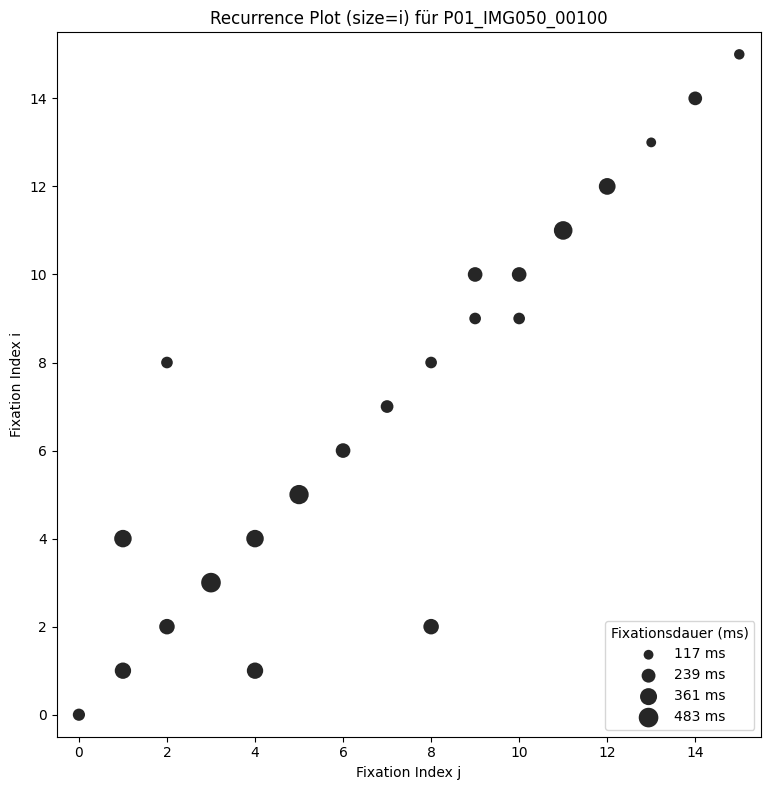

In [108]:
if rqa_file_path:
    plot_recurrence_GPT_ms(rqa_data_path=rqa_file_path)

In [109]:
# Pfad zur Eingabedatei und Definition des Schwellenwerts
parquet_file = '/Users/jandeuse/PycharmProjects/ews/code/preprocess/events/fixations/P02_IMG050_00100.parquet'
distance_thresh = 0.0625
output_dir = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/recurrence_matrix'

# 1. Erstellen und speichern Sie die Recurrence-Matrix
rqa_file_path = create_recurrence_matrix(
    file_path=parquet_file,
    distance_threshold=distance_thresh,
    output_dir=output_dir
)

RQA-Daten gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/P02_IMG050_00100_rqa_data.npz


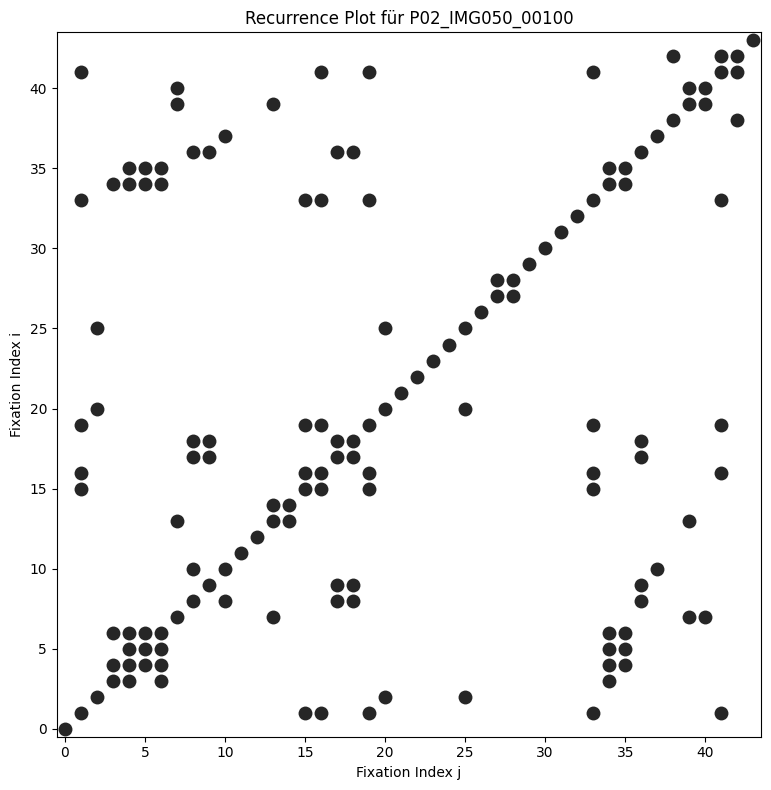

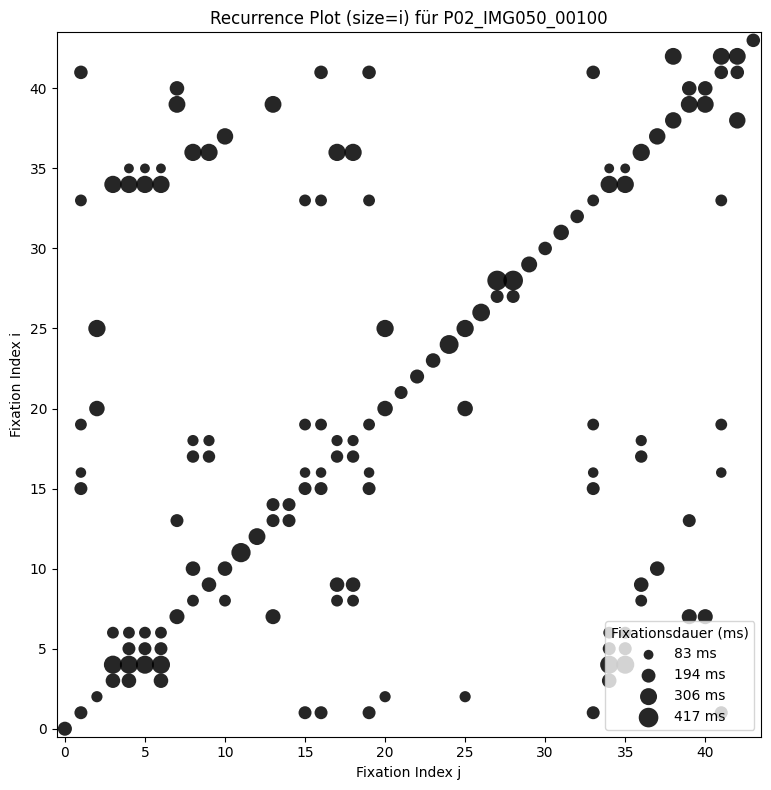

In [138]:
if rqa_file_path:
    plot_recurrence_GPT(rqa_data_path=rqa_file_path)
    plot_recurrence_GPT_ms(rqa_data_path=rqa_file_path)
    save_recurrencePlot_GPT

In [113]:
import glob

# Verzeichnisse und Parameter definieren
fixations_dir = '/Users/jandeuse/PycharmProjects/ews/code/preprocess/events/fixations'
output_dir = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data'
distance_thresh = 0.0625

# Sicherstellen, dass das Ausgabeverzeichnis existiert
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Alle Parquet-Dateien im Eingabeverzeichnis finden
parquet_files = glob.glob(os.path.join(fixations_dir, '*.parquet'))

# Die Funktion auf jede gefundene Datei anwenden
for file_path in parquet_files:
    print(f"Verarbeite Datei: {os.path.basename(file_path)}")
    create_recurrence_matrix(
        file_path=file_path,
        distance_threshold=distance_thresh,
        output_dir=output_dir
    )

print("\nVerarbeitung aller Dateien abgeschlossen.")

Verarbeite Datei: P18_IMG144_00001.parquet
RQA-Daten gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/P18_IMG144_00001_rqa_data.npz
Verarbeite Datei: P19_IMG134_00111.parquet
RQA-Daten gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/P19_IMG134_00111_rqa_data.npz
Verarbeite Datei: P07_IMG072_00100.parquet
RQA-Daten gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/P07_IMG072_00100_rqa_data.npz
Verarbeite Datei: P41_IMG054_00100.parquet
RQA-Daten gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/P41_IMG054_00100_rqa_data.npz
Verarbeite Datei: P11_IMG145_00011.parquet
RQA-Daten gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/P11_IMG145_00011_rqa_data.npz
Verarbeite Datei: P29_IMG030_01000.parquet
RQA-Daten gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/P29_IMG030_01000_rqa_data.npz
Verarbeite Datei: P15_IMG131_00111.parquet
RQA-Daten gespeichert

In [34]:
import numpy as np
import os
from typing import Dict, Union

def calculate_metrics(rqa_data_path: str, min_line: int = 2) -> Dict[str, Union[int, float]]:
    """
    Berechnet RQA-Metriken aus einer gespeicherten Rekurrenzmatrix.

    Berechnet R, REC, DET, D_L, LAM, H_L, V_L und CORM.

    Args:
        rqa_data_path (str): Pfad zur .npz-Datei, die 'recurrence_matrix' enthält.
        min_line (int): Mindestlänge einer Linie (diagonal, vertikal, horizontal).

    Returns:
        Dict[str, Union[int, float]]: Ein Dictionary mit den berechneten Metriken.
                                      Gibt ein leeres Dictionary bei einem Fehler zurück.
    """
    try:
        with np.load(rqa_data_path) as data:
            recurrence_matrix = data['recurrence_matrix']

        N = recurrence_matrix.shape[0]

        # R: Summe der oberen Dreiecksmatrix ohne die Diagonale (k=1)
        upper_triangle = np.triu(recurrence_matrix, k=1)
        R = np.sum(upper_triangle)

        # REC: Recurrence Rate in Prozent
        rec = 100 * (2 * R) / (N * (N - 1)) if N > 1 else 0.0

        # D_L: Punkte in diagonalen Linien
        D_L = 0
        for k in range(1, N):
            diag = np.diagonal(recurrence_matrix, offset=k)
            if diag.size < min_line:
                continue
            padded = np.concatenate(([0], diag, [0]))
            diff = np.diff(padded)
            starts = np.where(diff == 1)[0]
            ends = np.where(diff == -1)[0]
            for s, e in zip(starts, ends):
                length = e - s
                if length >= min_line:
                    D_L += length

        # DET: Determinismus in Prozent
        det = 100 * D_L / R if R > 0 else 0.0

        # H_L und V_L: Punkte in horizontalen und vertikalen Linien im oberen Dreieck
        H_L = 0  # Horizontale Linien im Plot (konstanter y-Wert -> Zeile in der Matrix)
        V_L = 0  # Vertikale Linien im Plot (konstanter x-Wert -> Spalte in der Matrix)

        for i in range(N):
            # Horizontale Linien im Plot entsprechen Zeilen in der Matrix
            row = upper_triangle[i, :]
            padded_row = np.concatenate(([0], row, [0]))
            diff_row = np.diff(padded_row)
            starts_row = np.where(diff_row == 1)[0]
            ends_row = np.where(diff_row == -1)[0]
            for s, e in zip(starts_row, ends_row):
                length = e - s
                if length >= min_line:
                    H_L += length

            # Vertikale Linien im Plot entsprechen Spalten in der Matrix
            col = upper_triangle[:, i]
            padded_col = np.concatenate(([0], col, [0]))
            diff_col = np.diff(padded_col)
            starts_col = np.where(diff_col == 1)[0]
            ends_col = np.where(diff_col == -1)[0]
            for s, e in zip(starts_col, ends_col):
                length = e - s
                if length >= min_line:
                    V_L += length

        # LAM: Laminarität in Prozent
        lam = 100 * (H_L + V_L) / (2 * R) if R > 0 else 0.0

        # CORM: Center of Recurrence Mass
        if R > 0 and N > 1:
            i_indices, j_indices = np.where(upper_triangle == 1)
            corm_numerator = np.sum(j_indices - i_indices)
            corm = 100 * corm_numerator / ((N - 1) * R)
        else:
            corm = 0.0

        metrics = {
            'N': int(N),
            'R': int(R),
            'REC': rec,
            'D_L': int(D_L),
            'DET': det,
            'H_L': int(H_L),
            'V_L': int(V_L),
            'LAM': lam,
            'CORM': corm
        }
        return metrics

    except FileNotFoundError:
        print(f"Fehler: Datei nicht gefunden: {rqa_data_path}")
        return {}
    except KeyError:
        print(f"Fehler: Schlüssel 'recurrence_matrix' nicht in {rqa_data_path} gefunden.")
        return {}
    except Exception as e:
        print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")
        return {}

# Beispiel für die Anwendung:
rqa_file = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/recurrence_matrix/P02_IMG050_00100_rqa_data.npz'
metrics_values = calculate_metrics(rqa_data_path=rqa_file)

if metrics_values:
    print(f"Metriken für die Datei '{os.path.basename(rqa_file)}':")
    print(f"  N = {metrics_values['N']}")
    print(f"  R = {metrics_values['R']}")
    print(f"  REC = {metrics_values['REC']:.2f}%")
    print(f"  D_L = {metrics_values['D_L']}")
    print(f"  DET = {metrics_values['DET']:.2f}%")
    print(f"  H_L = {metrics_values['H_L']}")
    print(f"  V_L = {metrics_values['V_L']}")
    print(f"  LAM = {metrics_values['LAM']:.2f}%")
    print(f"  CORM = {metrics_values['CORM']:.2f}%")

Metriken für die Datei 'P02_IMG050_00100_rqa_data.npz':
  N = 44
  R = 50
  REC = 5.29%
  D_L = 15
  DET = 30.00%
  H_L = 16
  V_L = 22
  LAM = 38.00%
  CORM = 35.21%


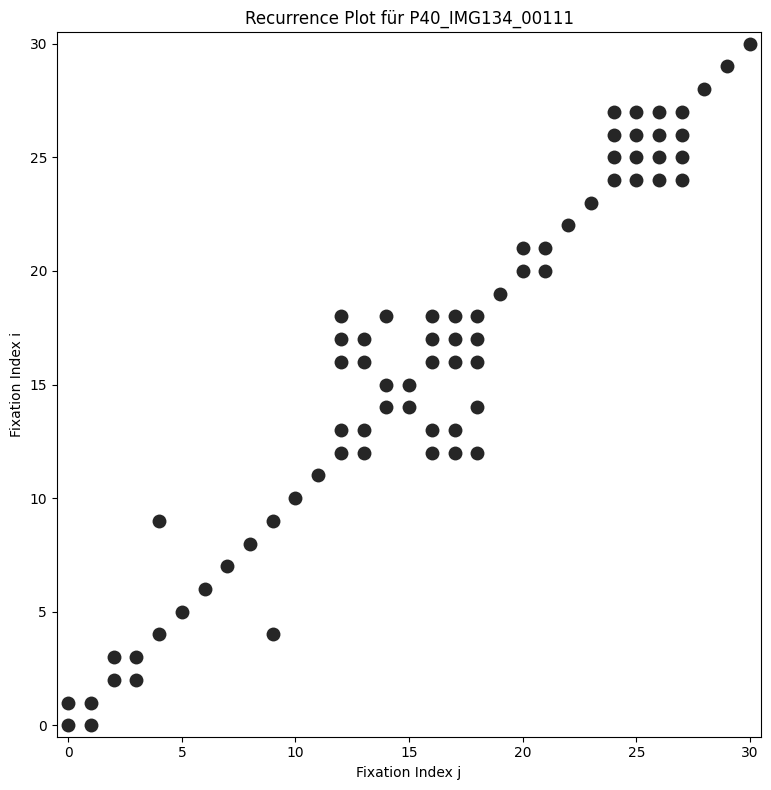

Metriken für die Datei 'P40_IMG134_00111_rqa_data.npz':
  N = 31
  R = 21
  REC = 4.52%
  DET = 47.62%
  LAM = 54.76%
  CORM = 7.94%


In [224]:
rqa_file = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/recurrence_matrix/P40_IMG134_00111_rqa_data.npz'
metrics_values = calculate_metrics(rqa_data_path=rqa_file)

plot_recurrence_GPT(rqa_data_path=rqa_file)

save_recurrencePlot_GPT(rqa_data_path=rqa_file)

if metrics_values:
    print(f"Metriken für die Datei '{os.path.basename(rqa_file)}':")
    print(f"  N = {metrics_values['N']}")
    print(f"  R = {metrics_values['R']}")
    print(f"  REC = {metrics_values['REC']:.2f}%")
    print(f"  DET = {metrics_values['DET']:.2f}%")
    print(f"  LAM = {metrics_values['LAM']:.2f}%")
    print(f"  CORM = {metrics_values['CORM']:.2f}%")

In [40]:
import os
import glob
import pandas as pd

# Verzeichnisse definieren
rqa_dir = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/recurrence_matrix'
metrics_dir = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/metrics'

# Sicherstellen, dass das Ausgabeverzeichnis existiert
os.makedirs(metrics_dir, exist_ok=True)

# Alle .npz-Dateien im RQA-Verzeichnis finden
rqa_files = glob.glob(os.path.join(rqa_dir, '*.npz'))

all_metrics = []

# Metriken für jede Datei berechnen und in einer Liste sammeln
for rqa_file in rqa_files:
    print(f"Verarbeite: {os.path.basename(rqa_file)}")

    metrics_values = calculate_metrics(rqa_data_path=rqa_file)

    if metrics_values:
        # Dateinamen für die spätere Identifikation hinzufügen
        metrics_values['filename'] = os.path.basename(rqa_file)
        all_metrics.append(metrics_values)

# Alle gesammelten Metriken in einen DataFrame umwandeln und speichern
if all_metrics:
    metrics_df = pd.DataFrame(all_metrics)

    # Spalte 'filename' nach vorne verschieben
    cols = ['filename'] + [col for col in metrics_df.columns if col != 'filename']
    metrics_df = metrics_df[cols]

    output_path = os.path.join(metrics_dir, 'all_rqa_metrics.csv')
    metrics_df.to_csv(output_path, index=False)
    print(f"\nAlle Metriken wurden erfolgreich in '{output_path}' gespeichert.")
else:
    print("\nKeine Metriken zum Speichern gefunden.")

Verarbeite: P43_IMG123_10111_rqa_data.npz
Verarbeite: P40_IMG117_10111_rqa_data.npz
Verarbeite: P22_IMG125_10001_rqa_data.npz
Verarbeite: P21_IMG111_10001_rqa_data.npz
Verarbeite: P43_IMG019_01000_rqa_data.npz
Verarbeite: P41_IMG081_00100_rqa_data.npz
Verarbeite: P48_IMG107_10111_rqa_data.npz
Verarbeite: P17_IMG054_00100_rqa_data.npz
Verarbeite: P22_IMG143_00001_rqa_data.npz
Verarbeite: P14_IMG060_00100_rqa_data.npz
Verarbeite: P03_IMG083_00100_rqa_data.npz
Verarbeite: P10_IMG090_00110_rqa_data.npz
Verarbeite: P41_IMG132_00101_rqa_data.npz
Verarbeite: P49_IMG039_00100_rqa_data.npz
Verarbeite: P20_IMG152_10011_rqa_data.npz
Verarbeite: P15_IMG138_00111_rqa_data.npz
Verarbeite: P35_IMG016_01001_rqa_data.npz
Verarbeite: P01_IMG127_00011_rqa_data.npz
Verarbeite: P05_IMG119_10001_rqa_data.npz
Verarbeite: P28_IMG122_10111_rqa_data.npz
Verarbeite: P38_IMG078_00100_rqa_data.npz
Verarbeite: P09_IMG151_10011_rqa_data.npz
Verarbeite: P49_IMG142_00001_rqa_data.npz
Verarbeite: P01_IMG141_10011_rqa_d

In [112]:
metrics_df

,filename,N,R,REC,D_L,DET,H_L,V_L,LAM,CORM
0,P43_IMG123_10111_rqa_data.npz,32,178,35.887097,129,72.471910,145,146,81.741573,31.297572
1,P40_IMG117_10111_rqa_data.npz,30,30,6.896552,7,23.333333,11,13,40.000000,31.494253
2,P22_IMG125_10001_rqa_data.npz,34,31,5.525847,11,35.483871,8,2,16.129032,24.242424
3,P21_IMG111_10001_rqa_data.npz,47,32,2.960222,7,21.875000,4,8,18.750000,30.842391
4,P43_IMG019_01000_rqa_data.npz,27,24,6.837607,8,33.333333,10,9,39.583333,29.166667
...,...,...,...,...,...,...,...,...,...,...
7419,P20_IMG029_01000_rqa_data.npz,24,27,9.782609,7,25.925926,8,10,33.333333,31.561997
7420,P27_IMG088_00111_rqa_data.npz,51,53,4.156863,18,33.962264,4,14,16.981132,23.584906
7421,P24_IMG036_00100_rqa_data.npz,17,5,3.676471,0,0.000000,0,0,0.000000,42.500000
7422,P38_IMG059_00100_rqa_data.npz,32,72,14.516129,17,23.611111,19,29,33.333333,32.795699


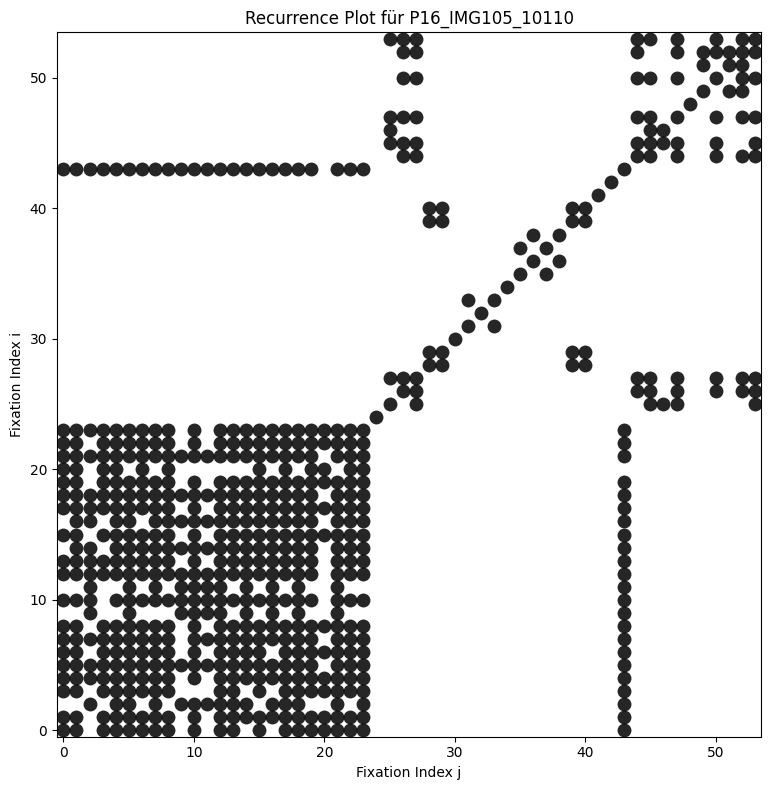

In [116]:
rqa_file = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/recurrence_matrix/P16_IMG105_10110_rqa_data.npz'

plot_recurrence_GPT(rqa_data_path=rqa_file)

In [42]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  7424 non-null   object 
 1   N         7424 non-null   int64  
 2   R         7424 non-null   int64  
 3   REC       7424 non-null   float64
 4   D_L       7424 non-null   int64  
 5   DET       7424 non-null   float64
 6   H_L       7424 non-null   int64  
 7   V_L       7424 non-null   int64  
 8   LAM       7424 non-null   float64
 9   CORM      7424 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 580.1+ KB


In [43]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_metrics_histograms(df: pd.DataFrame):
    """
    Plottet Histogramme für ausgewählte RQA-Metriken aus einem DataFrame.

    Args:
        df (pd.DataFrame): DataFrame, das die Spalten 'REC', 'DET', 'LAM' und 'CORM' enthält.
    """
    metrics_to_plot = ['REC', 'DET', 'LAM', 'CORM']

    # Überprüfen, ob alle erforderlichen Spalten im DataFrame vorhanden sind
    if not all(metric in df.columns for metric in metrics_to_plot):
        print(f"Fehler: Dem DataFrame fehlen eine oder mehrere der erforderlichen Spalten: {metrics_to_plot}")
        return

    # Erstellen eines 2x2-Subplot-Rasters
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Verteilung der RQA-Metriken', fontsize=16)

    # Durch die Metriken iterieren und auf den entsprechenden Achsen plotten
    for ax, metric in zip(axes.flatten(), metrics_to_plot):
        ax.hist(df[metric], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f'Histogramm von {metric}')
        ax.set_xlabel('Wert')
        ax.set_ylabel('Häufigkeit')
        ax.grid(axis='y', alpha=0.75)

    # Layout anpassen und Plot anzeigen
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_metrics_histograms(df: pd.DataFrame, metrics: list, safe_path=None):
    """
    Erstellt und zeigt Histogramme für eine Liste von Metriken in einem DataFrame an.

    Auf der y-Achse werden die relativen Häufigkeiten dargestellt.

    :param df: Das DataFrame, das die Metrikdaten enthält.
    :param metrics: Eine Liste von Spaltennamen (Metriken), für die Histogramme gezeichnet werden sollen.
    :param safe_path: Optionaler Pfad zum Speichern des Diagramms.
    """
    if not metrics:
        print("Keine Metriken zum Plotten angegeben.")
        return

    # Bestimmt die Anzahl der Zeilen und Spalten für ein quadratisches Subplot-Grid
    num_metrics = len(metrics)
    cols = int(np.ceil(np.sqrt(num_metrics)))
    rows = int(np.ceil(num_metrics / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    # Stellt sicher, dass 'axes' immer ein flaches Array ist
    axes = np.array(axes).flatten()

    for i, metric in enumerate(metrics):
        mean_ = df[metric].mean()
        median_ = df[metric].median()

        ax = axes[i]
        # Verwendet stat='probability', um relative Häufigkeiten zu erhalten
        sns.histplot(data=df, x=metric, ax=ax, stat='probability', binwidth=1)
        # Verwenden Sie ax.axvline und ax.legend, um auf dem spezifischen Subplot zu zeichnen
        ax.axvline(mean_, color='black', linestyle='-', linewidth=2, label=f'Durchschnitt: {mean_:.2f}')
        ax.axvline(median_, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_:.2f}')
        ax.set_title(f'Verteilung von {metric}')
        ax.set_xlabel(metric)
        ax.set_ylabel('Relative Häufigkeit')
        ax.legend()

    # Verbirgt ungenutzte Subplots
    for j in range(num_metrics, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    if safe_path:
        plt.savefig(safe_path, dpi=300, bbox_inches='tight')
        print(f"Diagramm gespeichert unter: {safe_path}")

    plt.show()

Diagramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/all_metrics_histogram.png


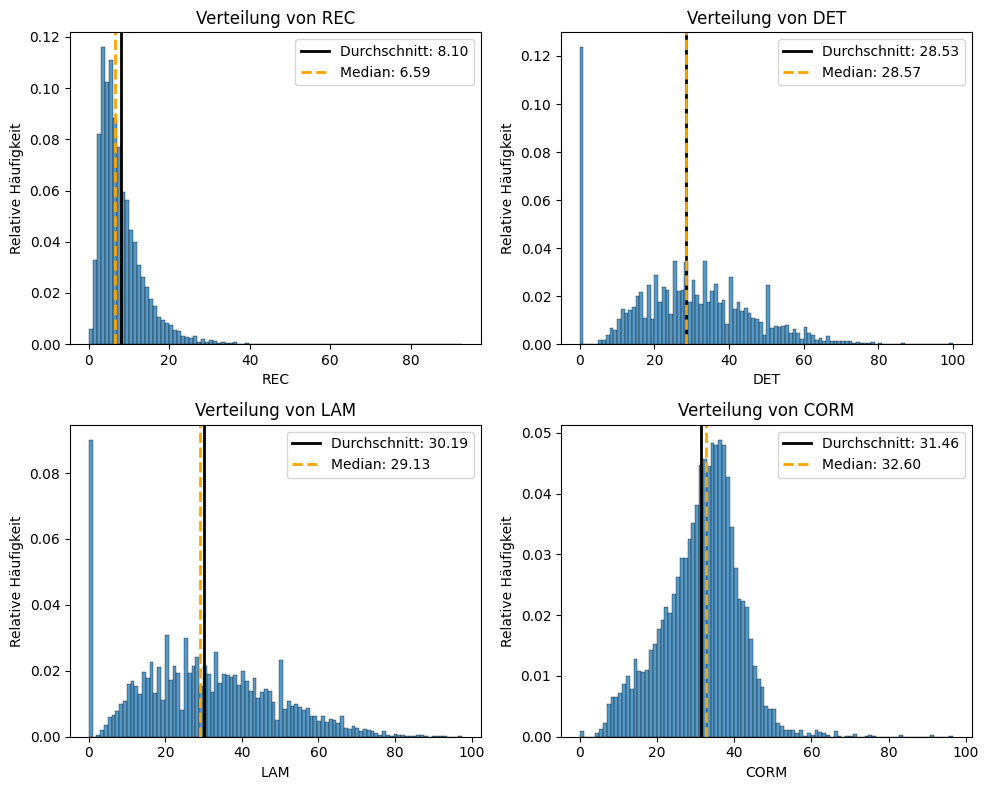

In [141]:
# Annahme: 'metrics_df' ist bereits aus der vorherigen Zelle geladen
# Beispiel für die Anwendung:
# Pfad zur CSV-Datei
file_path = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/metrics/all_rqa_metrics.csv'

# Lade die Daten in einen Pandas DataFrame
metrics_df = pd.read_csv(file_path)
metrics_to_plot = ['REC', 'DET', 'LAM', 'CORM']
safe_path = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/all_metrics_histogram.png'


if 'metrics_df' in locals() and isinstance(metrics_df, pd.DataFrame):
    plot_metrics_histograms(metrics_df, metrics = metrics_to_plot, safe_path=safe_path)

else:
    print("Das DataFrame 'metrics_df' wurde nicht gefunden. Bitte führen Sie zuerst die Zelle aus, die es erstellt.")


In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import os

def plot_correlation_grid(df: pd.DataFrame, metrics: list, figure_path: str):
    """
    Erstellt, zeigt und speichert ein Korrelationsgitter für eine Liste von Metriken.

    Jedes Feld im Gitter enthält einen Scatterplot für ein Metrikpaar,
    eine Regressionslinie und den Pearson-Korrelationskoeffizienten.

    Args:
        df (pd.DataFrame): Der DataFrame, der die Metrikdaten enthält.
        metrics (list): Eine Liste von Spaltennamen (Metriken), die geplottet werden sollen.
        figure_path (str): Der vollständige Pfad zum Speichern der Abbildung, einschließlich Dateiname.
    """
    # Stellt sicher, dass das Zielverzeichnis existiert
    output_dir = os.path.dirname(figure_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    def corr_func(x, y, **kwargs):
        """Berechnet und plottet den Pearson-Korrelationskoeffizienten."""
        r, _ = pearsonr(x, y)
        ax = plt.gca()
        ax.annotate(f"r = {r:.2f}", xy=(.1, .9), xycoords=ax.transAxes)

    # Erstellt das PairGrid
    g = sns.PairGrid(df, vars=metrics)

    # Füllt die untere Hälfte mit Regressionsplots
    g.map_lower(sns.regplot, scatter_kws={'alpha': 0.6}, marker = '.', line_kws={'color': 'blue'})

    # Füllt die Diagonale mit Histogrammen
    g.map_diag(sns.histplot)

    # Füllt die obere Hälfte mit den Korrelationswerten
    g.map_lower(corr_func)

    # Verbessert das Layout und fügt einen Titel hinzu
    g.fig.suptitle("Korrelationsmatrix der RQA-Metriken", y=1.02)
    plt.tight_layout()

    # Speichert die Abbildung
    g.savefig(figure_path)
    plt.close()
    print(f"Korrelationsgitter gespeichert unter: '{figure_path}'")


In [63]:

# Beispiel für die Verwendung:
# Annahme: Die CSV-Daten werden in einen DataFrame geladen
csv_path = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/metrics/all_rqa_metrics.csv'
# Laden Sie die Daten. Passen Sie dies an, wenn Ihre CSV keine Header-Zeile hat.
try:
    df = pd.read_csv(csv_path)

    # Liste der zu analysierenden Metriken
    selected_metrics = ['N', 'REC', 'DET', 'LAM', 'CORM']

    # Zieldateipfad für die Abbildung
    output_filename = "/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/correlation_matrix.png"

    # Rufen Sie die Funktion auf
    plot_correlation_grid(df, selected_metrics, output_filename)

except FileNotFoundError:
    print(f"Fehler: Die Datei '{csv_path}' wurde nicht gefunden.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")

Korrelationsgitter gespeichert unter: '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/correlation_matrix.png'


In [232]:
selected_metrics = ['N', 'LAM', 'DET','REC']
output_filename = "/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/correlation_matrix_N_LAM_DET_REC.png"
plot_correlation_grid(df, selected_metrics, output_filename)

Korrelationsgitter gespeichert unter: '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/correlation_matrix_N_LAM_DET_REC.png'


In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def create_comparison_histograms_person(csv_path, metrics, output_dir):
    """
    Erstellt und speichert Histogramme, die Metriken für zwei Kategorien von
    Dateinamen vergleichen.

    Die Kategorisierung basiert auf dem 15. Zeichen des Dateinamens ('0' oder '1').

    Args:
        csv_path (str): Der Pfad zur CSV-Datei mit den Metriken.
        metrics (list): Eine Liste von Spaltennamen (Metriken), für die
                        Histogramme erstellt werden sollen.
        output_dir (str): Das Verzeichnis, in dem die erstellten
                          Histogramm-Bilder gespeichert werden.
    """
    # Sicherstellen, dass das Ausgabeverzeichnis existiert
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Daten aus der CSV-Datei laden
    df = pd.read_csv(csv_path)

    # Eine neue Spalte 'category' basierend auf dem 14. Zeichen (Index 13) des Dateinamens erstellen
    df['category'] = df['filename'].str[13]

    # Daten für die beiden Kategorien filtern
    df_cat_0 = df[df['category'] == '0']
    df_cat_1 = df[df['category'] == '1']

    # Für jede Metrik in der Liste ein Histogramm erstellen
    for metric in metrics:
        if metric not in df.columns:
            print(f"Warnung: Metrik '{metric}' nicht in der CSV-Datei gefunden. Überspringe.")
            continue

        cat0_mean = df_cat_0[metric].mean()
        cat0_median = df_cat_0[metric].median()

        cat1_mean = df_cat_1[metric].mean()
        cat1_median = df_cat_1[metric].median()


        plt.figure(figsize=(10, 6))

        # Histogramme für beide Kategorien plotten
        plt.hist(df_cat_0[metric], bins=30, alpha=0.7, label='ohne Person', density=True)
        plt.hist(df_cat_1[metric], bins=30, alpha=0.7, label='mit Person', density=True)


        plt.axvline(cat0_median, color='#1f77b4', linestyle='--', linewidth=2, label=f'Median ohne Person: {cat0_median:.2f}')
        plt.axvline(cat1_median, color='#ff7f0e', linestyle='--', linewidth=2, label=f'Median mit Person: {cat1_median:.2f}')

        plt.title(f'Verteilung der Metrik: {metric}')
        plt.xlabel(metric)
        plt.ylabel('Dichte')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Dateipfad für das Ausgabe-Histogramm erstellen und speichern
        output_filename = os.path.join(output_dir, f'histogram_{metric}_comparison.png')
        plt.savefig(output_filename)
        plt.close()
        print(f"Histogramm gespeichert unter: {output_filename}")


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def create_comparison_histograms_balkenweise(csv_path, metrics, output_dir):
    """
    Erstellt und speichert Histogramme, die Metriken für zwei Kategorien von
    Dateinamen vergleichen.

    Die Kategorisierung basiert auf dem 15. Zeichen des Dateinamens ('0' oder '1').

    Args:
        csv_path (str): Der Pfad zur CSV-Datei mit den Metriken.
        metrics (list): Eine Liste von Spaltennamen (Metriken), für die
                        Histogramme erstellt werden sollen.
        output_dir (str): Das Verzeichnis, in dem die erstellten
                          Histogramm-Bilder gespeichert werden.
    """
    # Sicherstellen, dass das Ausgabeverzeichnis existiert
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Daten aus der CSV-Datei laden
    df = pd.read_csv(csv_path)

    # Eine neue Spalte 'category' basierend auf dem 14. Zeichen (Index 13) des Dateinamens erstellen
    df['category'] = df['filename'].str[13]

    # Daten für die beiden Kategorien filtern
    df_cat_0 = df[df['category'] == '0']
    df_cat_1 = df[df['category'] == '1']

    # Für jede Metrik in der Liste ein Histogramm erstellen
    for metric in metrics:
        if metric not in df.columns:
            print(f"Warnung: Metrik '{metric}' nicht in der CSV-Datei gefunden. Überspringe.")
            continue

        # Bestimme die gemeinsamen Bins für beide Datensätze
        bins = 30

        min_val = min(np.min(df_cat_0[metric]), np.min(df_cat_1[metric]))
        max_val = max(np.max(df_cat_0[metric]), np.max(df_cat_1[metric]))
        bin_edges = np.linspace(min_val, max_val, bins + 1)

        # Berechne die Histogramme (absolute Häufigkeiten)
        hist1, _ = np.histogram(df_cat_0[metric], bins=bin_edges)
        hist2, _ = np.histogram(df_cat_1[metric], bins=bin_edges)

        # Berechne die relativen Häufigkeiten
        rel_freq1 = hist1 / len(df_cat_0[metric])
        rel_freq2 = hist2 / len(df_cat_1[metric])

        # Setze die Positionen und die Breite der Balken
        bar_width = 0.4
        r1 = np.arange(len(hist1))
        r2 = [x + bar_width for x in r1]

        # Erstelle die Figur und die Achse
        plt.figure(figsize=(12, 7))

        # Plotte die Balken nebeneinander
        plt.bar(r1, rel_freq1, color='blue', width=bar_width, edgecolor='grey', label='ohne Person')
        plt.bar(r2, rel_freq2, color='red', width=bar_width, edgecolor='grey', label='mit Person')

        # Füge Beschriftungen und Titel hinzu
        plt.xlabel(metric, fontweight='bold')
        plt.ylabel('Relative Häufigkeit', fontweight='bold')
        plt.title(f'Vergleich der relativen Häufigkeiten für {metric}', fontweight='bold')

        # Passe die X-Achsen-Ticks an, um sie zwischen den Balkenpaaren zu zentrieren
        tick_labels = [f'{bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}' for i in range(len(bin_edges)-1)]
        plt.xticks([r + bar_width / 2 for r in range(len(hist1))], tick_labels, rotation=45, ha='right')

        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()


        # Dateipfad für das Ausgabe-Histogramm erstellen und speichern
        output_filename = os.path.join(output_dir, f'histogram_{metric}_comparison.png')
        plt.savefig(output_filename)
        plt.close()
        print(f"Histogramm gespeichert unter: {output_filename}")

In [213]:

# --- Beispiel für die Verwendung ---
# Pfad zur Ihrer CSV-Datei
csv_file_path = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/metrics/all_rqa_metrics.csv'

# Liste der Metriken, die Sie visualisieren möchten
# Annahme der Spaltennamen basierend auf den bereitgestellten Daten
metrics_to_plot = ['N', 'REC', 'DET', 'LAM', 'CORM']

# Ausgabeverzeichnis für die Grafiken
figures_output_dir = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Person_vs_noPerson'

# Rufen Sie die Funktion auf, um die Histogramme zu erstellen
create_comparison_histograms_person(csv_file_path, metrics_to_plot, figures_output_dir)

Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Person_vs_noPerson/histogram_N_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Person_vs_noPerson/histogram_REC_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Person_vs_noPerson/histogram_DET_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Person_vs_noPerson/histogram_LAM_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Person_vs_noPerson/histogram_CORM_comparison.png


In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def create_comparison_histograms_text(csv_path, metrics, output_dir):
    """
    Erstellt und speichert Histogramme, die Metriken für zwei Kategorien von
    Dateinamen vergleichen.

    Die Kategorisierung basiert auf dem 16. Zeichen des Dateinamens ('0' oder '1').

    Args:
        csv_path (str): Der Pfad zur CSV-Datei mit den Metriken.
        metrics (list): Eine Liste von Spaltennamen (Metriken), für die
                        Histogramme erstellt werden sollen.
        output_dir (str): Das Verzeichnis, in dem die erstellten
                          Histogramm-Bilder gespeichert werden.
    """
    # Sicherstellen, dass das Ausgabeverzeichnis existiert
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Daten aus der CSV-Datei laden
    df = pd.read_csv(csv_path)

    # Eine neue Spalte 'category' basierend auf dem 15. Zeichen (Index 14) des Dateinamens erstellen
    df['category'] = df['filename'].str[15]

    # Daten für die beiden Kategorien filtern
    df_cat_0 = df[df['category'] == '0']
    df_cat_1 = df[df['category'] == '1']

    # Für jede Metrik in der Liste ein Histogramm erstellen
    for metric in metrics:
        if metric not in df.columns:
            print(f"Warnung: Metrik '{metric}' nicht in der CSV-Datei gefunden. Überspringe.")
            continue

        cat0_mean = df_cat_0[metric].mean()
        cat0_median = df_cat_0[metric].median()

        cat1_mean = df_cat_1[metric].mean()
        cat1_median = df_cat_1[metric].median()


        plt.figure(figsize=(10, 6))

        # Histogramme für beide Kategorien plotten
        plt.hist(df_cat_0[metric], bins=30, alpha=0.7, label='ohne Text', density=True)
        plt.hist(df_cat_1[metric], bins=30, alpha=0.7, label='mit Text', density=True)


        plt.axvline(cat0_median, color='#1f77b4', linestyle='--', linewidth=2, label=f'Median ohne Text: {cat0_median:.2f}')
        plt.axvline(cat1_median, color='#ff7f0e', linestyle='--', linewidth=2, label=f'Median mit Text: {cat1_median:.2f}')

        plt.title(f'Verteilung der Metrik: {metric}')
        plt.xlabel(metric)
        plt.ylabel('Dichte')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Dateipfad für das Ausgabe-Histogramm erstellen und speichern
        output_filename = os.path.join(output_dir, f'histogram_{metric}_comparison.png')
        plt.savefig(output_filename)
        plt.close()
        print(f"Histogramm gespeichert unter: {output_filename}")


In [215]:

# --- Beispiel für die Verwendung ---
# Pfad zur Ihrer CSV-Datei
csv_file_path = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/metrics/all_rqa_metrics.csv'

# Liste der Metriken, die Sie visualisieren möchten
# Annahme der Spaltennamen basierend auf den bereitgestellten Daten
metrics_to_plot = ['N', 'REC', 'DET', 'LAM', 'CORM']

# Ausgabeverzeichnis für die Grafiken
figures_output_dir = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Text_vs_noText'

# Rufen Sie die Funktion auf, um die Histogramme zu erstellen
create_comparison_histograms_text(csv_file_path, metrics_to_plot, figures_output_dir)

Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Text_vs_noText/histogram_N_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Text_vs_noText/histogram_REC_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Text_vs_noText/histogram_DET_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Text_vs_noText/histogram_LAM_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Text_vs_noText/histogram_CORM_comparison.png


In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def create_comparison_histograms_meme(csv_path, metrics, output_dir):
    """
    Erstellt und speichert Histogramme, die Metriken für zwei Kategorien von
    Dateinamen vergleichen.

    Die Kategorisierung basiert auf dem 12. Zeichen des Dateinamens ('0' oder '1').

    Args:
        csv_path (str): Der Pfad zur CSV-Datei mit den Metriken.
        metrics (list): Eine Liste von Spaltennamen (Metriken), für die
                        Histogramme erstellt werden sollen.
        output_dir (str): Das Verzeichnis, in dem die erstellten
                          Histogramm-Bilder gespeichert werden.
    """
    # Sicherstellen, dass das Ausgabeverzeichnis existiert
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Daten aus der CSV-Datei laden
    df = pd.read_csv(csv_path)

    # Eine neue Spalte 'category' basierend auf dem 12. Zeichen (Index 11) des Dateinamens erstellen
    df['category'] = df['filename'].str[11]

    # Daten für die beiden Kategorien filtern
    df_cat_0 = df[df['category'] == '0']
    df_cat_1 = df[df['category'] == '1']

    # Für jede Metrik in der Liste ein Histogramm erstellen
    for metric in metrics:
        if metric not in df.columns:
            print(f"Warnung: Metrik '{metric}' nicht in der CSV-Datei gefunden. Überspringe.")
            continue

        cat0_mean = df_cat_0[metric].mean()
        cat0_median = df_cat_0[metric].median()

        cat1_mean = df_cat_1[metric].mean()
        cat1_median = df_cat_1[metric].median()


        plt.figure(figsize=(10, 6))

        # Histogramme für beide Kategorien plotten
        plt.hist(df_cat_0[metric], bins=30, alpha=0.7, label='ohne Meme', density=True)
        plt.hist(df_cat_1[metric], bins=30, alpha=0.7, label='mit Meme', density=True)


        plt.axvline(cat0_median, color='#1f77b4', linestyle='--', linewidth=2, label=f'Median ohne Meme: {cat0_median:.2f}')
        plt.axvline(cat1_median, color='#ff7f0e', linestyle='--', linewidth=2, label=f'Median mit Meme: {cat1_median:.2f}')

        plt.title(f'Verteilung der Metrik: {metric}')
        plt.xlabel(metric)
        plt.ylabel('Dichte')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Dateipfad für das Ausgabe-Histogramm erstellen und speichern
        output_filename = os.path.join(output_dir, f'histogram_{metric}_comparison.png')
        plt.savefig(output_filename)
        plt.close()
        print(f"Histogramm gespeichert unter: {output_filename}")


In [217]:

# --- Beispiel für die Verwendung ---
# Pfad zur Ihrer CSV-Datei
csv_file_path = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/metrics/all_rqa_metrics.csv'

# Liste der Metriken, die Sie visualisieren möchten
# Annahme der Spaltennamen basierend auf den bereitgestellten Daten
metrics_to_plot = ['N', 'REC', 'DET', 'LAM', 'CORM']

# Ausgabeverzeichnis für die Grafiken
figures_output_dir = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Meme_vs_noMeme'

# Rufen Sie die Funktion auf, um die Histogramme zu erstellen
create_comparison_histograms_meme(csv_file_path, metrics_to_plot, figures_output_dir)

Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Meme_vs_noMeme/histogram_N_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Meme_vs_noMeme/histogram_REC_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Meme_vs_noMeme/histogram_DET_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Meme_vs_noMeme/histogram_LAM_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Meme_vs_noMeme/histogram_CORM_comparison.png


In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def create_comparison_histograms_Ort(csv_path, metrics, output_dir):
    """
    Erstellt und speichert Histogramme, die Metriken für zwei Kategorien von
    Dateinamen vergleichen.

    Die Kategorisierung basiert auf dem 13. Zeichen des Dateinamens ('0' oder '1').

    Args:
        csv_path (str): Der Pfad zur CSV-Datei mit den Metriken.
        metrics (list): Eine Liste von Spaltennamen (Metriken), für die
                        Histogramme erstellt werden sollen.
        output_dir (str): Das Verzeichnis, in dem die erstellten
                          Histogramm-Bilder gespeichert werden.
    """
    # Sicherstellen, dass das Ausgabeverzeichnis existiert
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Daten aus der CSV-Datei laden
    df = pd.read_csv(csv_path)

    # Eine neue Spalte 'category' basierend auf dem 13. Zeichen (Index 12) des Dateinamens erstellen
    df['category'] = df['filename'].str[12]

    # Daten für die beiden Kategorien filtern
    df_cat_0 = df[df['category'] == '0']
    df_cat_1 = df[df['category'] == '1']

    # Für jede Metrik in der Liste ein Histogramm erstellen
    for metric in metrics:
        if metric not in df.columns:
            print(f"Warnung: Metrik '{metric}' nicht in der CSV-Datei gefunden. Überspringe.")
            continue

        cat0_mean = df_cat_0[metric].mean()
        cat0_median = df_cat_0[metric].median()

        cat1_mean = df_cat_1[metric].mean()
        cat1_median = df_cat_1[metric].median()


        plt.figure(figsize=(10, 6))

        # Histogramme für beide Kategorien plotten
        plt.hist(df_cat_0[metric], bins=30, alpha=0.7, label='ohne Ort', density=True)
        plt.hist(df_cat_1[metric], bins=30, alpha=0.7, label='mit Ort', density=True)


        plt.axvline(cat0_median, color='#1f77b4', linestyle='--', linewidth=2, label=f'Median ohne Ort: {cat0_median:.2f}')
        plt.axvline(cat1_median, color='#ff7f0e', linestyle='--', linewidth=2, label=f'Median mit Ort: {cat1_median:.2f}')

        plt.title(f'Verteilung der Metrik: {metric}')
        plt.xlabel(metric)
        plt.ylabel('Dichte')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Dateipfad für das Ausgabe-Histogramm erstellen und speichern
        output_filename = os.path.join(output_dir, f'histogram_{metric}_comparison.png')
        plt.savefig(output_filename)
        plt.close()
        print(f"Histogramm gespeichert unter: {output_filename}")


In [219]:

# --- Beispiel für die Verwendung ---
# Pfad zur Ihrer CSV-Datei
csv_file_path = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/metrics/all_rqa_metrics.csv'

# Liste der Metriken, die Sie visualisieren möchten
# Annahme der Spaltennamen basierend auf den bereitgestellten Daten
metrics_to_plot = ['N', 'REC', 'DET', 'LAM', 'CORM']

# Ausgabeverzeichnis für die Grafiken
figures_output_dir = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Ort_vs_noOrt'

# Rufen Sie die Funktion auf, um die Histogramme zu erstellen
create_comparison_histograms_Ort(csv_file_path, metrics_to_plot, figures_output_dir)

Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Ort_vs_noOrt/histogram_N_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Ort_vs_noOrt/histogram_REC_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Ort_vs_noOrt/histogram_DET_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Ort_vs_noOrt/histogram_LAM_comparison.png
Histogramm gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/Ort_vs_noOrt/histogram_CORM_comparison.png


In [132]:
pip install Pillow


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [143]:
import cv2
import os
import numpy as np

def plot_heatmap_on_image(heatmap_file_path):
    """
    Plottet eine gegebene Heatmap über das zugehörige Originalbild und speichert das Ergebnis.

    Args:
        heatmap_file_path (str): Der vollständige Pfad zur Heatmap-Datei (z.B. .../heatmaps/P16_IMG105_10110.png).
    """
    # Basis-Verzeichnisse
    image_folder = '/Users/jandeuse/PycharmProjects/ews/data/img/img_bin'
    output_folder = '/Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/heatmap_img'

    # Sicherstellen, dass der Ausgabeordner existiert
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    try:
        # Dateinamen aus dem Pfad extrahieren
        heatmap_filename = os.path.basename(heatmap_file_path)

        # Den Bild-spezifischen Teil des Dateinamens extrahieren (z.B. "IMG105_10110.png")
        image_part_png = '_'.join(heatmap_filename.split('_')[1:])
        # Die Dateiendung zu .jpg ändern
        image_filename_jpg = os.path.splitext(image_part_png)[0] + '.jpg'

        # Pfade zusammensetzen
        original_image_path = os.path.join(image_folder, image_filename_jpg)
        output_path = os.path.join(output_folder, heatmap_filename)

        # Bilder laden
        original_img = cv2.imread(original_image_path)
        if original_img is None:
            print(f"Fehler: Originalbild konnte nicht geladen werden: {original_image_path}")
            return

        heatmap_img = cv2.imread(heatmap_file_path)
        if heatmap_img is None:
            print(f"Fehler: Heatmap konnte nicht geladen werden: {heatmap_file_path}")
            return

        # Heatmap auf die Größe des Originalbildes skalieren
        heatmap_resized = cv2.resize(heatmap_img, (original_img.shape[1], original_img.shape[0]))

        # Heatmap über das Originalbild legen (mit Transparenz)
        alpha = 0.5  # Transparenz der Heatmap
        overlayed_image = cv2.addWeighted(original_img, 1 - alpha, heatmap_resized, alpha, 0)

        # Ergebnisbild speichern
        cv2.imwrite(output_path, overlayed_image)
        print(f"Überlagertes Bild gespeichert unter: {output_path}")

    except Exception as e:
        print(f"Ein Fehler ist aufgetreten: {e}")



In [229]:
# Beispiel für die Verwendung der Methode:
heatmap_path_example = '/Users/jandeuse/PycharmProjects/ews/code/preprocess/heatmaps/P40_IMG134_00111.png'
plot_heatmap_on_image(heatmap_path_example)

Überlagertes Bild gespeichert unter: /Users/jandeuse/PycharmProjects/ews/code/rqa/rqa_data/figures/heatmap_img/P40_IMG134_00111.png


In [233]:
met_det_0 = metrics_df[(metrics_df['DET'] == 0)]
met_lam_0 = metrics_df[(metrics_df['LAM'] == 0)]

In [235]:
met_det_0_median = met_det_0['REC'].median()
met_lam_0_median = met_lam_0['REC'].median()
print(met_det_0_median)
print(met_lam_0_median)

3.8558500323206206
3.3846153846153846
